# EDA Notebook Part-1

# Auther Name: Umar Mehmood

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import the data set
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Step-1  Composition

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [8]:
df['survived'].unique()

array([0, 1], dtype=int64)

In [9]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

Make a New Column Based on age

In [14]:
max(df['age'])

80.0

In [15]:
min(df['age'])

0.42

In [16]:
bins = [0,5,10,15,18,40,80]
lables = ['0-5', '6-10', '11-15', '16-18', '19-40', '41-80']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=lables)

In [17]:
df['age_group'].value_counts()

age_group
19-40    425
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: count, dtype: int64

In [22]:
df.groupby('sex')['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,19-40,41-80
sex,,,,,,
female,21,10,12,25,145,48
male,23,10,7,31,280,102


In [24]:
df.groupby('who')['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,19-40,41-80
who,,,,,,
child,44,20,19,0,0,0
man,0,0,0,31,280,102
woman,0,0,0,25,145,48


In [23]:
# find out the meximum value of child
df[df['who']=='child']['age'].max()

15.0

In [26]:
# find out the meximum value of man
max_age_man =  df[df['who']=='man']['age'].max()
min_age_man =  df[df['who']=='man']['age'].min()

# show the result
print("The Maximum age of man is", max_age_man)
print("The Minimum age of man is", min_age_man)

The Maximum age of man is 80.0
The Minimum age of man is 16.0


The Maximum age of woman is 63.0
The Minimum age of woman is 16.0


<Axes: xlabel='sex'>

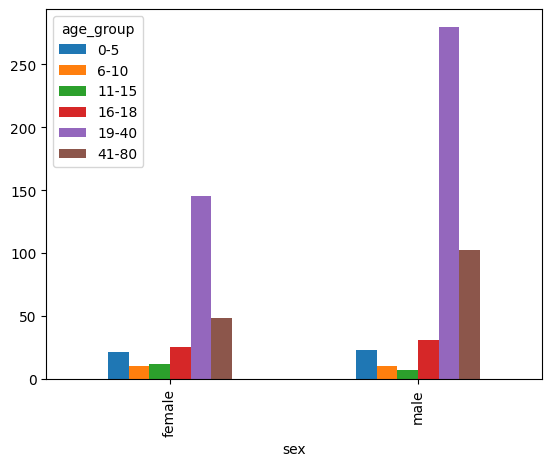

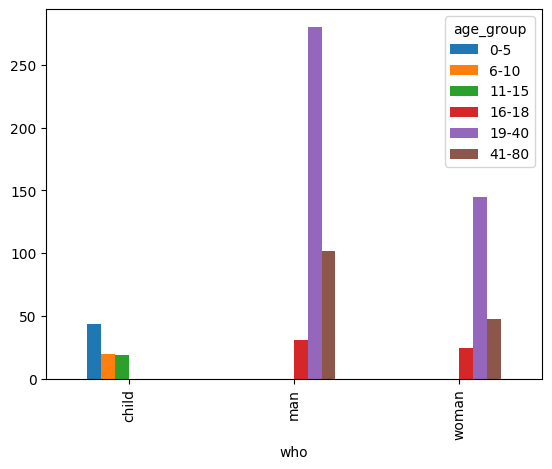

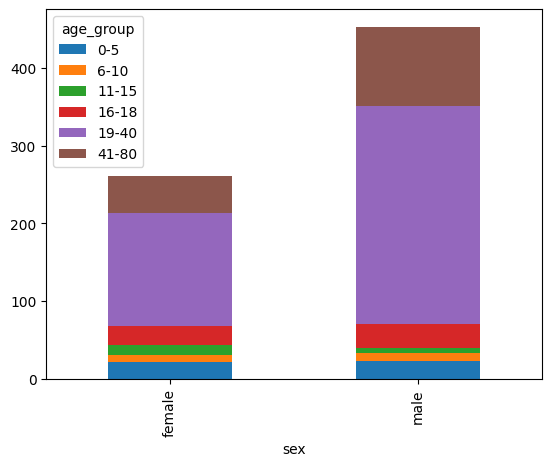

In [27]:
# find out the meximum & minimum value of woman
max_age_woman =  df[df['who']=='woman']['age'].max()
min_age_woman =  df[df['who']=='woman']['age'].min()

# show the result

print("The Maximum age of woman is", max_age_woman)
print("The Minimum age of woman is", min_age_woman)
df.groupby('sex')['age_group'].value_counts().unstack().plot(kind='bar')
df.groupby('who')['age_group'].value_counts().unstack().plot(kind='bar')
df.groupby('sex')['age_group'].value_counts().unstack().plot(kind='bar', stacked=True)

In [28]:
df.groupby('who')[['age_group', 'class']].value_counts().unstack()

class            First  Second  Third
who   age_group                      
child 0-5            3      13     28
      6-10           0       4     16
      11-15          3       2     14
      16-18          0       0      0
      19-40          0       0      0
      41-80          0       0      0
man   0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          2       6     23
      19-40         46      63    171
      41-80         50      21     31
woman 0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          8       4     13
      19-40         48      47     50
      41-80         26      13      9

In [29]:
df.groupby('who')[['survived', 'class']].value_counts().unstack()

class           First  Second  Third
who   survived                      
child 0             1       0     33
      1             5      19     25
man   0            77      91    281
      1            42       8     38
woman 0             2       6     58
      1            89      60     56

In [30]:
df.groupby('who')[['survived', 'class', 'alone']].value_counts().unstack()

alone                  False  True 
who   survived class               
child 0        First       1      0
               Second      0      0
               Third      31      2
      1        First       5      0
               Second     19      0
               Third      21      4
man   0        First      27     50
               Second     26     65
               Third      50    231
      1        First      17     25
               Second      1      7
               Third       6     32
woman 0        First       1      1
               Second      3      3
               Third      36     22
      1        First      56     33
               Second     31     29
               Third      23     33

In [31]:
df.groupby('who')[['survived',  'alone']].value_counts().unstack()

alone           False  True 
who   survived              
child 0            32      2
      1            45      4
man   0           103    346
      1            24     64
woman 0            40     26
      1           110     95

<Axes: xlabel='age', ylabel='fare'>

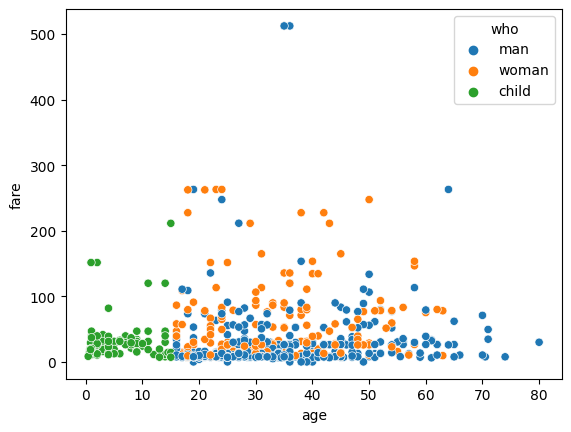

In [35]:
# create a scatter plot
sns.scatterplot(data=df, x='age', y='fare', hue='who')

<Axes: xlabel='age', ylabel='fare'>

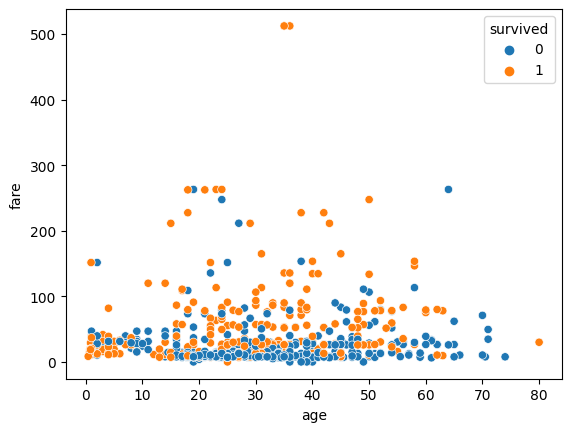

In [36]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')

<Axes: xlabel='who', ylabel='fare'>

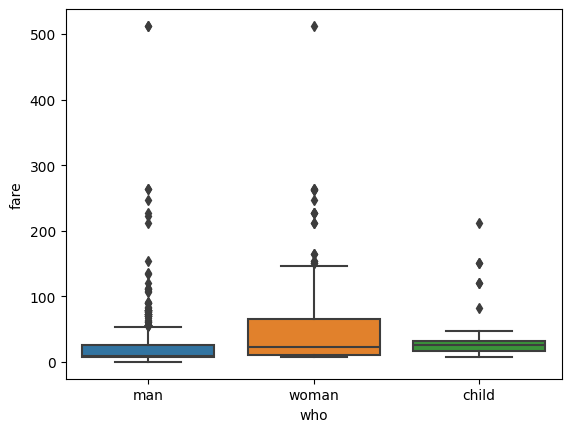

In [34]:
# crate a box plot
sns.boxplot(data=df, x='who', y='fare')

In [39]:
import plotly.express as px

# create a scatter plot
fig = px.scatter(df, x='age', y='fare', color='who')
fig.show()

In [40]:
# create a box plot
fig = px.box(df, x='survived', y='fare', color='who')
fig.show()

In [41]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

In [43]:
# create a box plot
fig = px.box(df, x='survived', y='fare', color='sex')
fig.show()

In [46]:
# create a box plot
fig = px.scatter(df, x='age', y='fare', color='embark_town')
fig.show()

In [ ]:
# create a box plot
fig = px.box(df, x='survived', y='fare', color='embark_town')
fig.show()

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



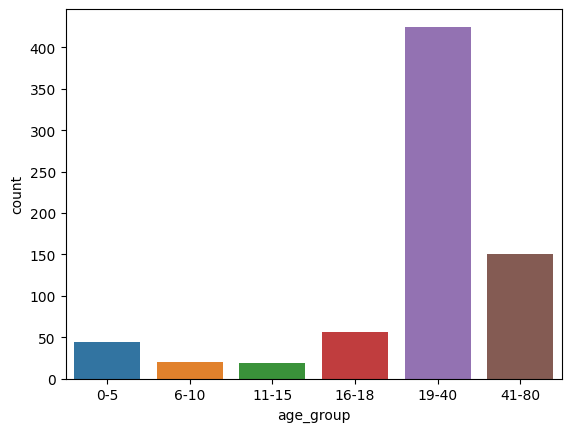

In [48]:
sns.countplot(df, x='age_group')
plt.show()

# Check this Distribution

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='age', ylabel='Count'>

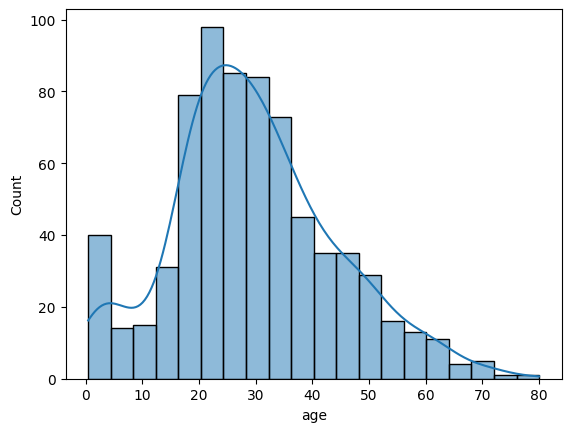

In [52]:
sns.histplot(df, x='age', kde=True)

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='fare', ylabel='Count'>

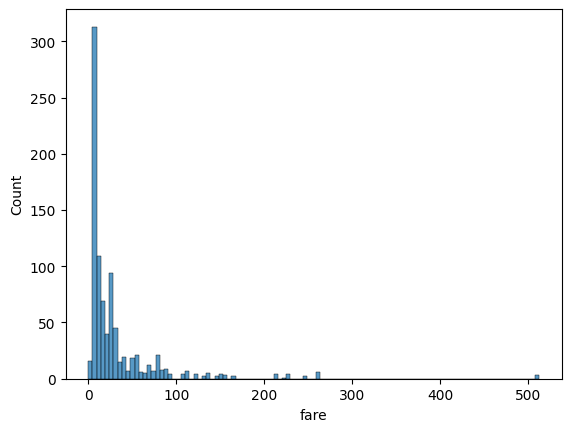

In [51]:
sns.histplot(df, x='fare')

In [58]:
# shapiro wilk test
from scipy.stats import shapiro
# Remove the missing value
age_data = df['age'].dropna()

stat, p = shapiro(age_data)

print('statistics:', stat)
print(' p-value:', p)

# interpretation
alpha = 0.05
if p > alpha:
    
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    




statistics: 0.981458306312561
 p-value: 7.340329943872348e-08
Sample does not look Gaussian (reject H0)


c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and wi

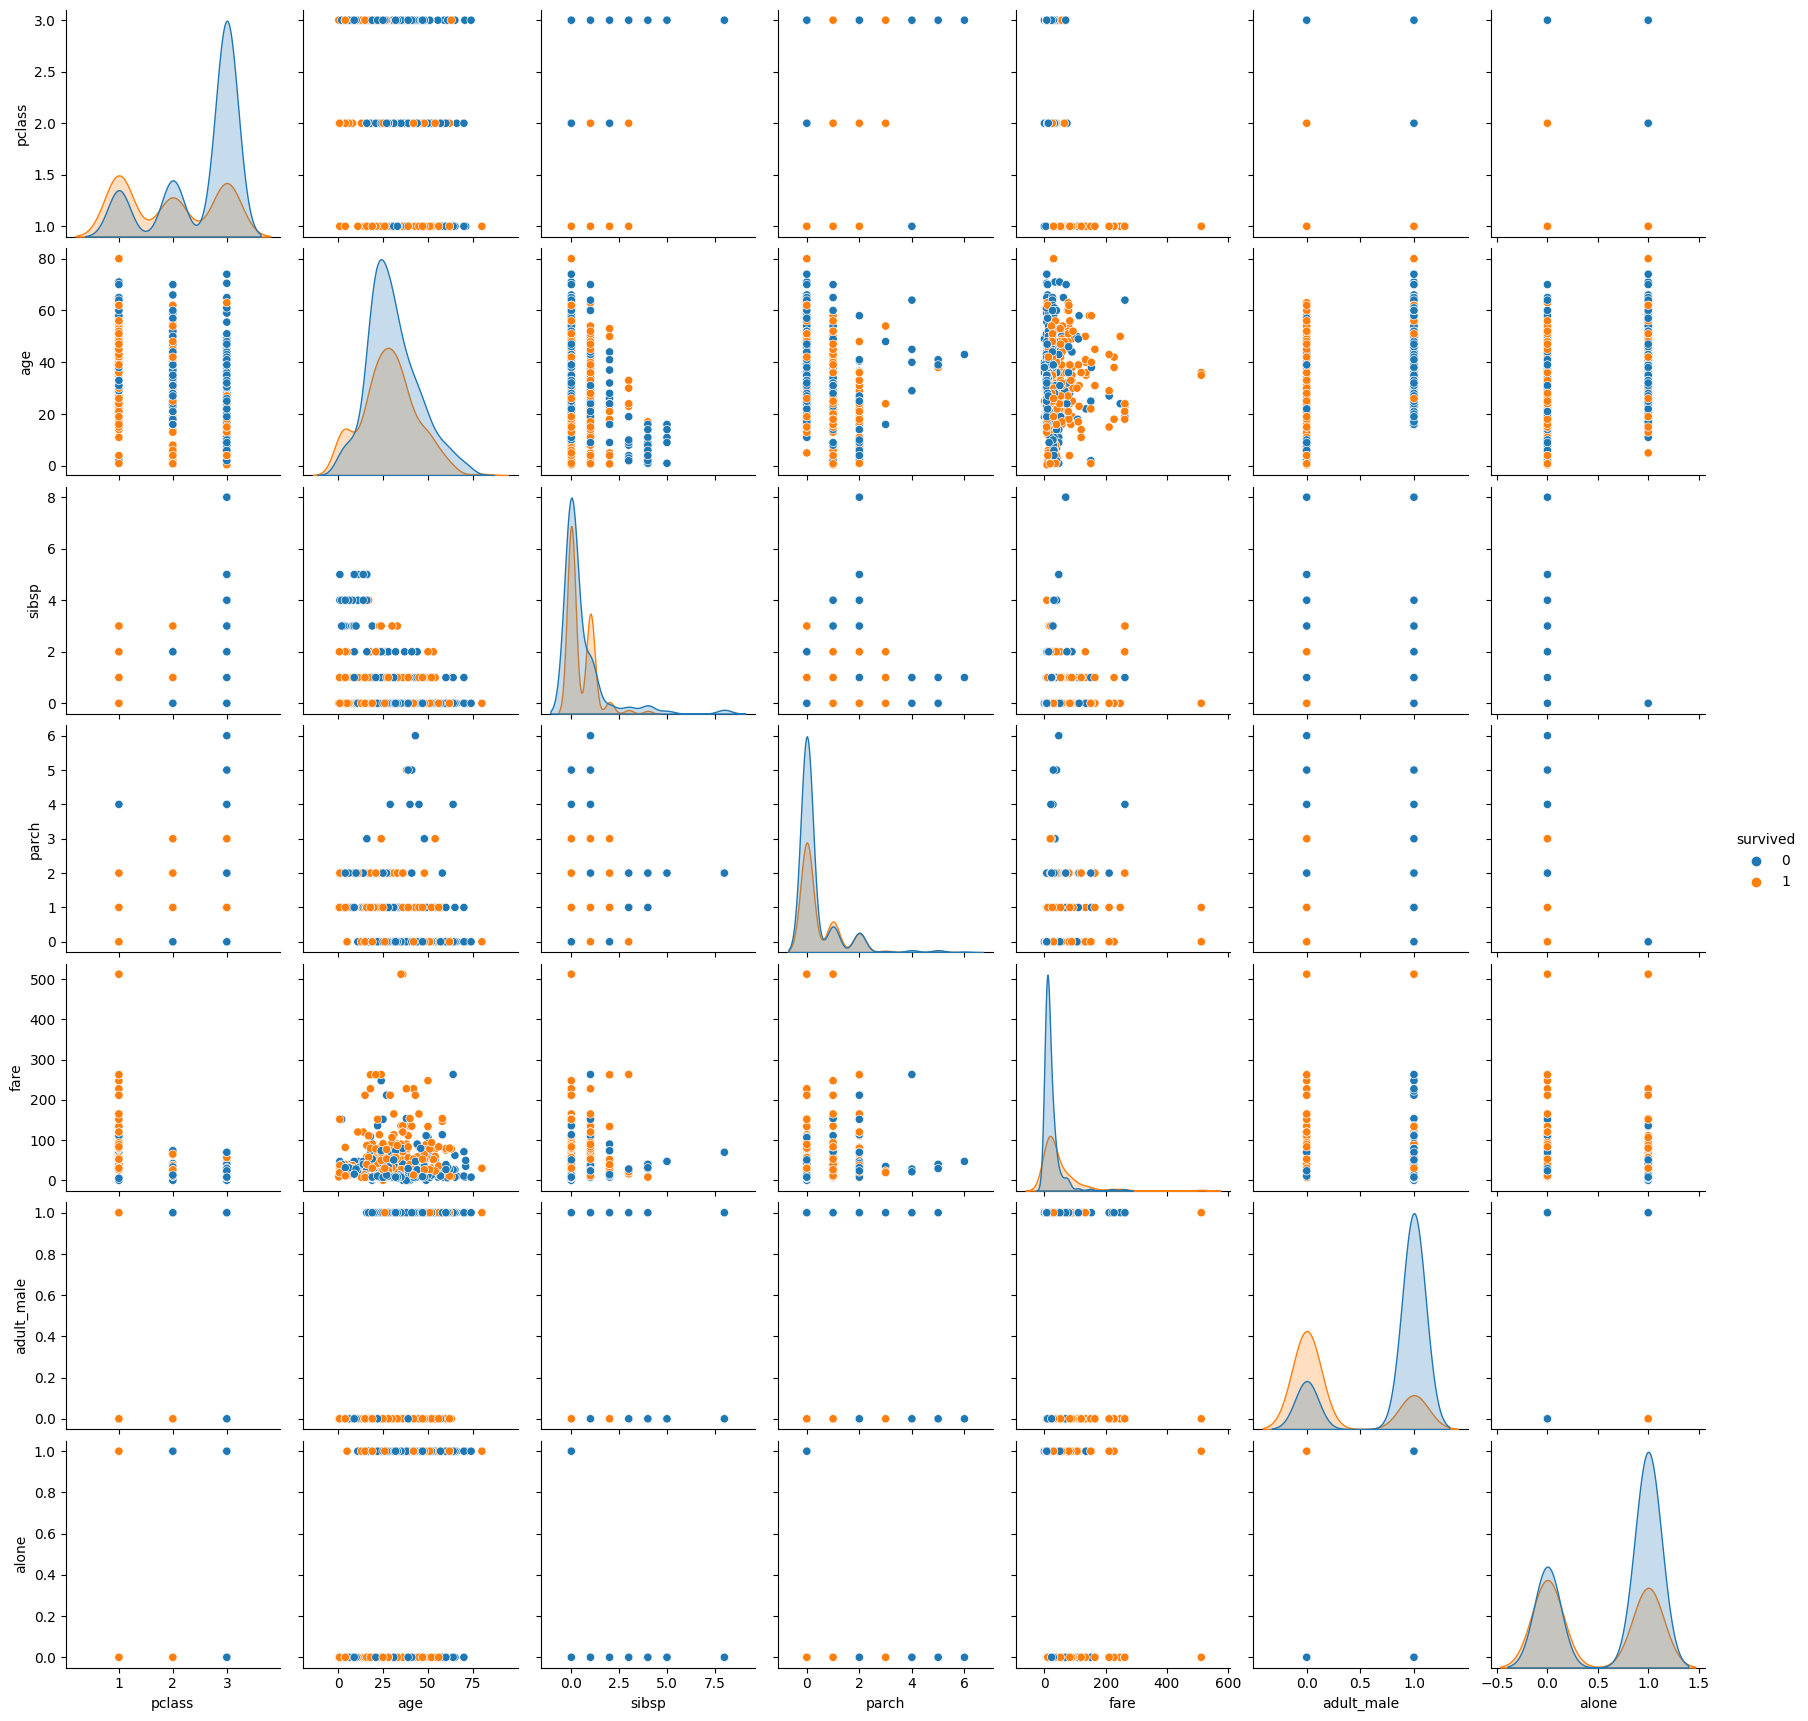

In [60]:
# create a pair plot
sns.pairplot(df, hue='survived')

<Axes: >

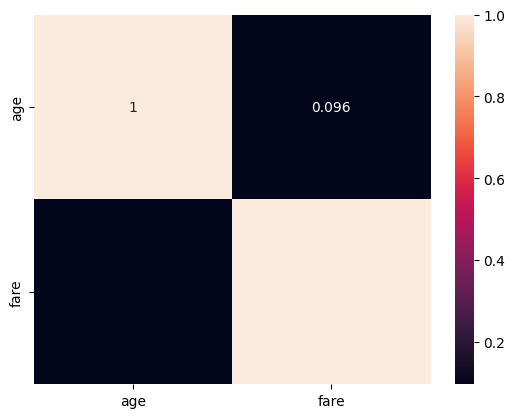

In [61]:
corr = df[['age', 'fare']].corr()
sns.heatmap(corr, annot=True)

# Impute the Null Values in Python